### Results on data subset with trajectory length 6

Quantitative results: Prediction accuracies on train and test sets

Qualitative results: t-SNE visualization nad cluster analysis

In [2]:
import sys
print sys.executable

/Users/lisa1010/dev/dkt/venv/bin/python


In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from collections import defaultdict
from experiments import *
from utils import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tflearn.data_utils import to_categorical, pad_sequences
from experiments import *
from sklearn.metrics import accuracy_score
from sklearn import cluster
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-darkgrid')
%matplotlib inline
# import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

/Users/lisa1010/dev/dkt/venv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
print tf.__version__

0.11.0


In [7]:
traj_len = 6
hoc_num = 18
x, y, student_ids = load_data_will_student_solve_next_problem_traj_len(hoc_num, only_traj_len=traj_len, y_is_seq=False)
x_train, x_test, y_train, y_test, student_ids_train, student_ids_test = train_test_split(x, y, student_ids, test_size=0.1, random_state=42)

Loading data...
Data loaded.


In [5]:
model_id = "predict_next_prob_binary_two_layer_traj_len_{}".format(traj_len)
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    saved_model = load_model(model_id, load_checkpoint=True, is_training=False, timesteps=traj_len)
#     x, y, student_ids = load_data_will_student_solve_next_problem_traj_len(hoc_num, only_traj_len=traj_len, y_is_seq=False)
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    pred_train =np.argmax(saved_model.predict(x_train), axis=1)
    pred_test_probs = saved_model.predict(x_test)
    pred_test = np.argmax(pred_test_probs, axis=1)
    train_acc = accuracy_score(pred_train, np.argmax(y_train, axis=1))
    test_acc = accuracy_score(pred_test,  np.argmax(y_test, axis=1))
    print ("Train acc: {}\t Test acc: {}".format(train_acc, test_acc))

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../best_checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/-544
Checkpoint loaded.
Model loaded.
Train acc: 0.865312107248	 Test acc: 0.856873822976


In [6]:
y_test = np.argmax(y_test, axis=1)

In [7]:
sample_with_highest_prob = np.argmax(np.array(pred_test_probs)[:,0])
sample_with_lowest_prob =  np.argmin(np.array(pred_test_probs)[:,0])
print ("sample with highest probability: {}, student id: {}".format(sample_with_highest_prob, student_ids[sample_with_highest_prob]))
print ("sample with lowest probability: {}, student id: {}".format(sample_with_lowest_prob, student_ids[sample_with_lowest_prob]))

sample with highest probability: 216, student id: 23468
sample with lowest probability: 254, student id: 28499


In [8]:
y_test_colors = ['c' if y_test[i] == 1 else 'm' for i in xrange(len(y_test)) ]
pred_test_colors = ['c' if pred_test[i] == 1 else 'm' for i in xrange(len(pred_test)) ]

In [12]:
traj_len = 6

x, y, student_ids = load_data_will_student_solve_next_problem_traj_len(hoc_num, only_traj_len=traj_len, y_is_seq=False)
x_train, x_test, y_train, y_test, student_ids_train, student_ids_test = train_test_split(x, y, student_ids, test_size=0.1, random_state=42)
model_id = "predict_next_prob_binary_two_layer_traj_len_{}".format(traj_len)
hidden_reps = None
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    hidden_rep_model = load_model(model_id, load_checkpoint=True, is_training=False, get_hidden_rep=True)
    hidden_reps = np.array(hidden_rep_model.predict(x_test))

Loading data...


Data loaded.
Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../best_checkpoints/predict_next_prob_binary_two_layer_traj_len_6/
../checkpoints/predict_next_prob_binary_two_layer_traj_len_6/-544
Checkpoint loaded.
Model loaded.


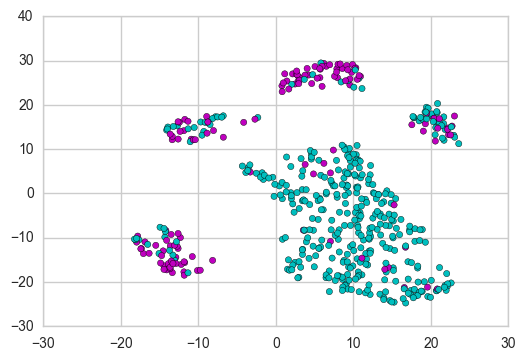

In [29]:
pca = PCA(n_components=8)
pca_results = pca.fit_transform(hidden_reps)
tsne_model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_results = tsne_model.fit_transform(pca_results) 


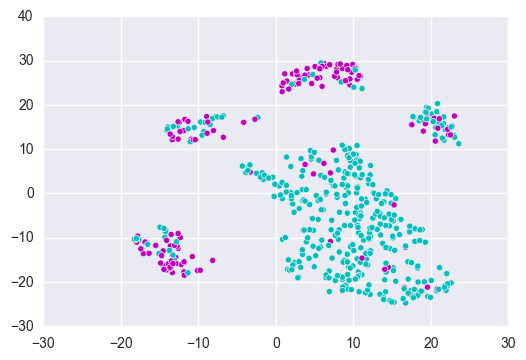

In [53]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=y_test_colors)

In [176]:
print pred_test.shape

(531,)


In [175]:
print y_test.shape

(531,)


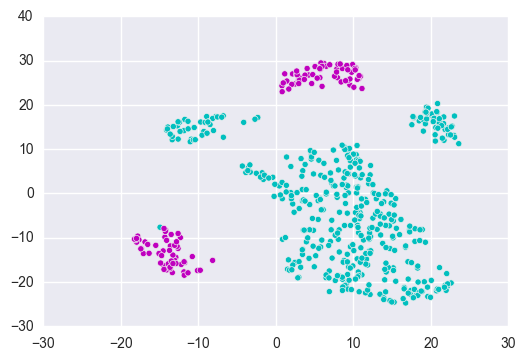

In [54]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=pred_test_colors)

In [180]:
check_if_path_exists_or_create('../saved_matrices/')
np.save(open('../saved_matrices/tsne_results_traj_len_6.npy', 'wb+'), tsne_results)
np.save(open('../saved_matrices/y_test_traj_len_6.npy', 'wb+'), y_test)
np.save(open('../saved_matrices/pred_test_binary_traj_len_6.npy', 'wb+'), pred_test)
np.save(open('../saved_matrices/pred_test_probs_traj_len_6.npy', 'wb+'), pred_test_probs[:,1])

In [ ]:
# Finding the clusters analytically with Kmeans

In [103]:
n_clusters = 5
kmeans_model = cluster.MiniBatchKMeans(n_clusters=n_clusters)

In [104]:
kmeans_model.fit(hidden_reps)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [105]:
kmeans_cluster_idx = kmeans_model.predict(hidden_reps)

In [106]:
colors = np.array(sns.color_palette("Set2", n_clusters))

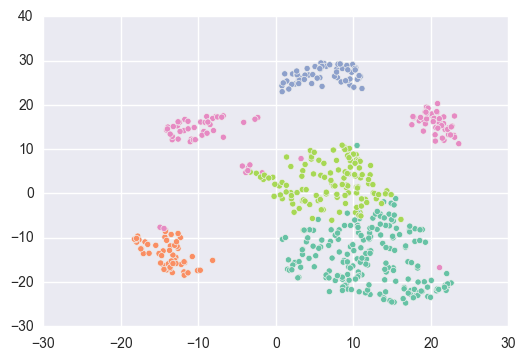

In [107]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=colors[kmeans_cluster_idx])

In [100]:
clusters = defaultdict(list)

for cl in xrange(n_clusters):
    for i in xrange(len(hidden_reps)):
        if kmeans_cluster_idx[i] == cl:
            clusters[cl].append(i)
            

In [102]:
for cl in clusters:
    print len(clusters[cl])

318
57
61
95


In [94]:
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
spectral.fit(hidden_reps)
spectral_cluster_idx = spectral.fit_predict(hidden_reps)

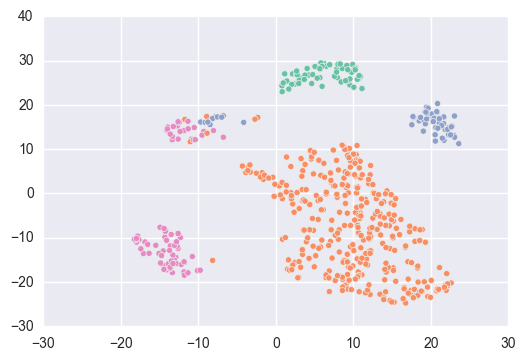

In [95]:
dim_0 = np.reshape(tsne_results[:,0], tsne_results.shape[0])
dim_1 = np.reshape(tsne_results[:,1], tsne_results.shape[0])
plt.scatter(dim_0, dim_1, c=colors[spectral_cluster_idx])

## five clusters: 

A: big red one

B-E: small clusters going clockwise

(40, 2)
(40,)


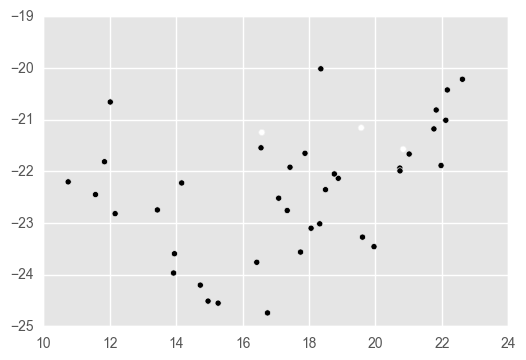

In [34]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] > 10, tsne_results[:,1] < -20))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print pred_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

In [210]:
print y_test[cluster_indices]
print pred_test[cluster_indices]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [211]:
for i in np.random.choice(len(cluster_indices), 5, replace=False):
    c = cluster_indices[i]
    print ("sample at index: {}".format(c))
    prediction = pred_test[c]
    true_y = y_test[c]
    print ("predicted: {}, true: {}".format(prediction, true_y))
    student =  student_ids_test[c]
    traj_id = student_to_traj_map[student]
    print_all_asts_in_traj(hoc_num, traj_id,  filename='../chosen_trajectories/cluster_a_{}.json'.format(i))

    print ("#####################################")

sample at index: 510
predicted: 1, true: 1
../data/hoc18/asts/59.json
59
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'isPathRight'},
                                                                           {u'children': [{u'children': [{u'id': u'2',
                                                                                                          u'type': u'turnRight'}],
                                                                                           u'id': u'3',
                                                                                           u'type': u'maze_turn'}],
                                                                            u'id': u'4',
           

In [212]:
# Cluster B:

(13, 2)
(13,)


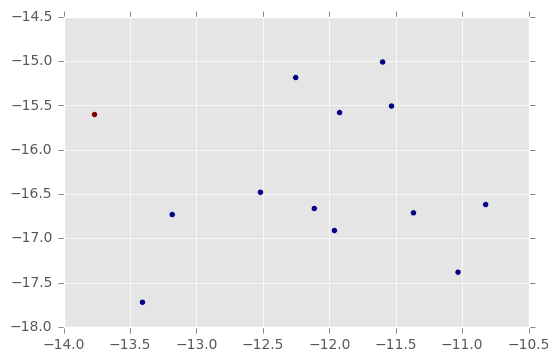

In [213]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] < -10, tsne_results[:,1] < -15))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print y_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

In [214]:
for i in np.random.choice(len(cluster_indices), 5, replace=False):
    c = cluster_indices[i]
    print ("sample at index: {}".format(c))
    prediction = pred_test[c]
    true_y = y_test[c]
    print ("predicted: {}, true: {}".format(prediction, true_y))
    student =  student_ids_test[c]
    traj_id = student_to_traj_map[student]
    print_all_asts_in_traj(hoc_num, traj_id,  filename='../chosen_trajectories/cluster_b_{}.json'.format(i))

    print ("#####################################")

sample at index: 38
predicted: 0, true: 0
../data/hoc18/asts/70.json
70
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'turnRight'}],
                                                             u'id': u'2',
                                                             u'type': u'maze_turn'}],
                                              u'id': u'3',
                                              u'type': u'statementList'}],
                               u'id': u'4',
                               u'type': u'DO'}],
                u'id': u'5',
                u'type': u'maze_forever'}],
 u'id': u'6',
 u'type': u'program'}
../data/hoc18/asts/4.json
4
{u'children': [{u'children': [{u'children': [{u'

In [215]:
# Cluster C

(21, 2)
(21,)


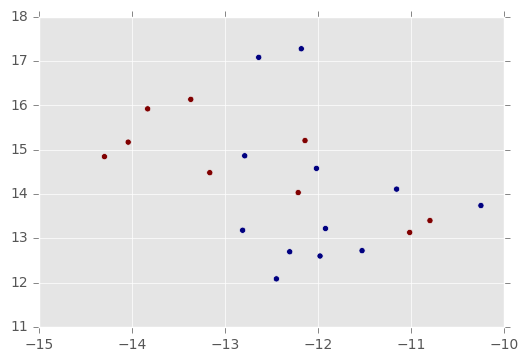

In [216]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] < -10, tsne_results[:,1] > 10))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print y_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

In [217]:
for i in np.random.choice(len(cluster_indices), 5, replace=False):
    c = cluster_indices[i]
    print ("sample at index: {}".format(c))
    prediction = pred_test[c]
    true_y = y_test[c]
    print ("predicted: {}, true: {}".format(prediction, true_y))
    student =  student_ids_test[c]
    traj_id = student_to_traj_map[student]
    print_all_asts_in_traj(hoc_num, traj_id,  filename='../chosen_trajectories/cluster_c_{}.json'.format(i))

    print ("#####################################")

sample at index: 366
predicted: 1, true: 1
../data/hoc18/asts/9.json
9
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'isPathForward'},
                                                                           {u'children': [{u'children': [{u'id': u'2',
                                                                                                          u'type': u'turnRight'}],
                                                                                           u'id': u'3',
                                                                                           u'type': u'maze_turn'}],
                                                                            u'id': u'4',
           

In [218]:
# Cluster D (mostly unsuccessful):

(23, 2)
(23,)


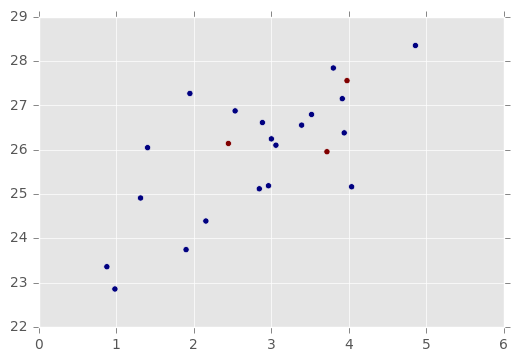

In [219]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] < 5, tsne_results[:,1] > 20))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print y_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

In [220]:
for i in np.random.choice(len(cluster_indices), 5, replace=False):
    c = cluster_indices[i]
    print ("sample at index: {}".format(c))
    prediction = pred_test[c]
    true_y = y_test[c]
    print ("predicted: {}, true: {}".format(prediction, true_y))
    student =  student_ids_test[c]
    traj_id = student_to_traj_map[student]
    print_all_asts_in_traj(hoc_num, traj_id,  filename='../chosen_trajectories/cluster_d_{}.json'.format(i))

    print ("#####################################")

sample at index: 448
predicted: 0, true: 0
../data/hoc18/asts/11801.json
11801
{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                              u'type': u'turnLeft'}],
                               u'id': u'1',
                               u'type': u'maze_turn'},
                              {u'id': u'2', u'type': u'maze_moveForward'},
                              {u'id': u'3', u'type': u'maze_moveForward'},
                              {u'id': u'4', u'type': u'maze_moveForward'},
                              {u'children': [{u'id': u'5',
                                              u'type': u'turnLeft'}],
                               u'id': u'6',
                               u'type': u'maze_turn'},
                              {u'id': u'7', u'type': u'maze_moveForward'},
                              {u'id': u'8', u'type': u'maze_moveForward'},
                              {u'id': u'9', u'type': u'maze_moveForward'},
               

In [221]:
# Cluster E: mixed successful / unssuccessful, but for some reason it's own little cluster

(47, 2)
(47,)


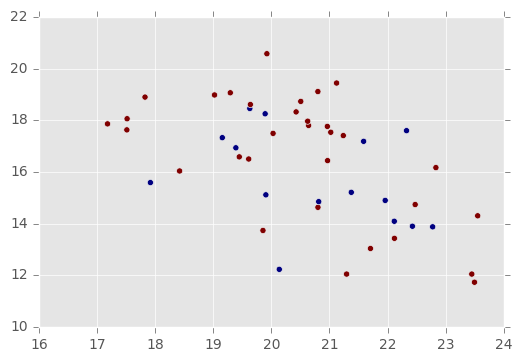

In [222]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] > 15, tsne_results[:,1] > 10))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print y_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=y_test[cluster_indices])

(47, 2)
(47,)


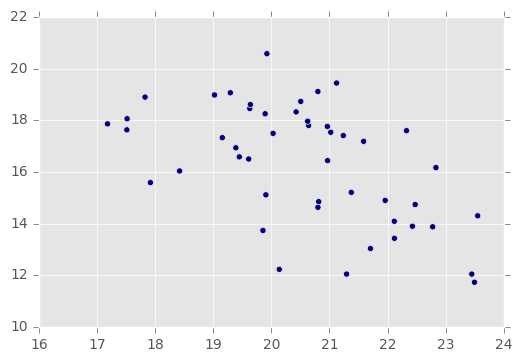

In [223]:
cluster_indices = np.where(np.logical_and(tsne_results[:,0] > 15, tsne_results[:,1] > 10))[0]
tsne_results_cluster = tsne_results[cluster_indices]
print tsne_results_cluster.shape
dim_0 = np.reshape(tsne_results_cluster[:,0], tsne_results_cluster.shape[0])
dim_1 = np.reshape(tsne_results_cluster[:,1], tsne_results_cluster.shape[0])
print pred_test[cluster_indices].shape
plt.scatter(dim_0, dim_1, c=pred_test[cluster_indices])

In [224]:
for i in np.random.choice(len(cluster_indices), 5, replace=False):
    c = cluster_indices[i]
    print ("sample at index: {}".format(c))
    prediction = pred_test[c]
    true_y = y_test[c]
    print ("predicted: {}, true: {}".format(prediction, true_y))
    student =  student_ids_test[c]
    traj_id = student_to_traj_map[student]
    print_all_asts_in_traj(hoc_num, traj_id,  filename='../chosen_trajectories/cluster_e_{}.json'.format(i))

    print ("#####################################")

sample at index: 305
predicted: 1, true: 1
../data/hoc18/asts/2.json
2
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'isPathLeft'},
                                                                           {u'children': [{u'children': [{u'id': u'2',
                                                                                                          u'type': u'turnLeft'}],
                                                                                           u'id': u'3',
                                                                                           u'type': u'maze_turn'}],
                                                                            u'id': u'4',
               

In [225]:
student_highest_prob = student_ids[sample_with_highest_prob]
student_lowest_prob = student_ids[sample_with_lowest_prob]
traj_highest_prob = student_to_traj_map[student_highest_prob]
traj_lowest_prob = student_to_traj_map[student_lowest_prob]

In [205]:
print_all_asts_in_traj(hoc_num, traj_highest_prob, filename='../chosen_trajectories/most_likely_unsuccessful.json')

../data/hoc18/asts/103.json
103
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'turnLeft'}],
                                                             u'id': u'2',
                                                             u'type': u'maze_turn'},
                                                            {u'id': u'3',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'4',
                                                                            u'type': u'turnLeft'}],
                                                             u'id': u'5',
                         

In [206]:
print_all_asts_in_traj(hoc_num, traj_lowest_prob, filename='../chosen_trajectories/most_likely_successful.json')

../data/hoc18/asts/316.json
316
{u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                             u'type': u'maze_moveForward'},
                                                            {u'children': [{u'id': u'1',
                                                                            u'type': u'turnLeft'}],
                                                             u'id': u'2',
                                                             u'type': u'maze_turn'},
                                                            {u'children': [{u'id': u'3',
                                                                            u'type': u'isPathForward'},
                                                                           {u'children': [{u'children': [{u'id': u'4',
                                                                                                          u'type': u'turnRight'}],
           

In [125]:
print pred_test_probs[sample_with_lowest_prob]

[0.03570331633090973, 0.9642966985702515]


In [126]:
print y_test[sample_with_lowest_prob]

1


In [208]:
import pprint
with open('../chosen_trajectories/most_likely_successful.json', 'rb+') as f:
    traj_json =  json.load(f)
pprint.pprint(traj_json)

{u'79125': [{u'316': {u'children': [{u'children': [{u'children': [{u'children': [{u'id': u'0',
                                                                                  u'type': u'maze_moveForward'},
                                                                                 {u'children': [{u'id': u'1',
                                                                                                 u'type': u'turnLeft'}],
                                                                                  u'id': u'2',
                                                                                  u'type': u'maze_turn'},
                                                                                 {u'children': [{u'id': u'3',
                                                                                                 u'type': u'isPathForward'},
                                                                                                {u'children': [{u'children': 

In [226]:
traj_to_score_map = get_traj_to_score_map(hoc_num)

In [227]:
print traj_to_score_map[62046]

0.00319335688514


In [228]:
print traj_to_score_map[79125]

0.00355098120092


In [233]:
traj_id = 79125

student_to_traj_map = get_student_to_traj_map(hoc_num)
students_who_solved_next_problem = set(get_students_who_solved_next_problem(hoc_num))
student_ids = sorted(student_to_traj_map.keys())
result_students = []
for s in student_ids:
    if student_to_traj_map[s] == traj_id:
        result_students.append(s)
        
count = 0
for s in result_students:
    if s in students_who_solved_next_problem:
        count += 1
success_rate = count / float(len(result_students))

In [234]:
print success_rate

1.0


In [235]:
print len(result_students)

1


In [236]:
print result_students

[28499]
